# SAMPLER QNN
Sampler QNN is a neural network in the qiskit_machine_learning library.It optionally requires the sampler primitive .
What makes it different?  Unlike the Estimator QNN it excludes the need for observables and feeds of from the samples provided in the quantum circuit.The network is based on the samples resulting from measuring the quantum circuit.

The Sampler QNN requires us to specify an interpret function to post pocess our samples.The function enables the network to infer the output.The downside of not using an interpret function is that the probability vector scales exponentially.

This Notebook ,introduces you to the basics of a sampler qnn,declaring inputs and weights and finally shows you how to perform
a Forward Pass.

In [6]:
#importing Dependencies
import qiskit 
import pylatexenc
from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister
from qiskit.circuit import ParameterVector,Parameter # Used for creating input and weight parameters
from qiskit_machine_learning.neural_networks import SamplerQNN
from qiskit.utils import algorithm_globals # For Reproducability
algorithm_globals.random_seed= 42 

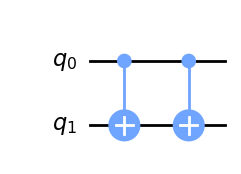

In [12]:
# Creating our circuit and then input and weight vectors
q = QuantumRegister(2)
c = ClassicalRegister(2)
qc = QuantumCircuit(2)
inputs = ParameterVector("input",3)
weights = ParameterVector("weight",6)
qc.ry = (inputs[0],0)
qc.ry =(inputs[1],1)
qc.rx = (inputs[2],2)
qc.cx(0,1)
qc.ry = (weights[0],0)
qc.rx = (weights[1],1)
qc.ry = (weights[2],2)
qc.cx(0,1)
qc.ry = (weights[2],0)
qc.rx = (weights[3],1)
qc.ry= (weights[4],2)
qc.draw("mpl")

# SAMPLER QNN :: INSTANTIATE + FORWARD PASS

In [13]:
s_qnn = SamplerQNN(circuit=qc,input_params=inputs,weight_params =weights)
# Creating dummy inputs using algorithm globals
s_qnn_input = algorithm_globals.random.random(s_qnn.num_inputs)
s_qnn_weights = algorithm_globals.random.random(s_qnn.num_weights)

In [14]:
# lETS SEE ,WHICH ARE OUR TARINABLE INPUTS AND WEIGHTS 
print(f"The total number of input_features for our Sampler QNN are {s_qnn.num_inputs}|\ninput{s_qnn_input}")
print(f"The total number of weigths for our Sampler QNN are {s_qnn.num_weights}|\nweights {s_qnn_weights}")

The total number of input_features for our Sampler QNN are 3|
input[0.45038594 0.37079802 0.92676499]
The total number of weigths for our Sampler QNN are 6|
weights [0.64386512 0.82276161 0.4434142  0.22723872 0.55458479 0.06381726]


# FORWARD PASS

In [ ]:
# Forward Pass
s_qnn_forward = s_qnn.forward(s_qnn_input,s_qnn_weights)
s_qnn_forward

In [ ]:
len(inputs),len(weights),len(qc)

# REFERENCES 
https://qiskit.org/ecosystem/machine-learning/tutorials/01_neural_networks.html